## All import statements

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# importing color map module:
from matplotlib import cm

# MSE: Mean Squared Error
moving from toy cost functions to a real regression cost: the Residual Sum of Squares (RSS) and its normalized form Mean Squared Error (MSE).

### RSS (intuition): sum of squared residuals:
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta (x^{(i)}) \big)^2 $$

Measures how much of the dependent variable’s variation the model does not explain.
RSS = 0 ⇒ perfect fit.

### MSE (why divide by n?):
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta (x^{(i)}) \big)^2 $$
MSE = average of the squared residuals; more numerically stable for large datasets.
Dividing by n keeps the magnitude of the cost manageable and helps avoid floating-point overflow when n is large.

Notation: h_\theta(x) (hypothesis) and \hat{y} (y-hat) are equivalent ways to denote predicted values. The course uses ŷ (y-hat) in code.

### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y}) \big)^2 $$

- **LaTeX** tips used in notebook:

\$$ ... \$$ for centered display math.

\sum_{i=1}^{n} for summation with limits.

\frac{1}{n} for fractions.

\hat{y} for y-hat.

\big( ... \big)^2 or \left( ... \right)^2 for large parentheses.

In [2]:
# Practical impl. (Python):

# RSS (raw sum):
# rss = np.sum((y_true - y_pred)**2)
# MSE (recommended):
# mse = np.mean((y_true - y_pred)**2)
# or
# mse = np.sum((y_true - y_pred)**2) / len(y_true)

Use MSE in gradient descent to compute cost and gradients for linear regression.

Takeaway: use MSE as your cost when working with real datasets — it’s conceptually the same as RSS but safer numerically and comparable across dataset sizes.

**KEY TERMS / Questions**

RSS — total squared error (not averaged).

MSE - RSS divided by n — average squared error; preferred cost for regression.

ŷ (y-hat): symbol for predicted value (same as h_θ​(x)).

Overflow error: when computed numbers exceed floating-point limits; dividing by n reduces risk.

Practical question: when you implement gradient descent with MSE, are you using the vectorized gradient formula (fast) or computing gradients pointwise (slow)? (Vectorized is recommended.)

**Summary**

RSS measures total squared error; MSE is the average squared error (RSS / n). MSE is preferred for real datasets because averaging keeps cost magnitudes reasonable and helps avoid overflow when n is large. In notebooks, use LaTeX (\$$...\$$) to display RSS/MSE nicely. Implement MSE in Python with np.mean((y_true - y_pred)**2) and use it as the cost function in gradient descent.

## Work begins here:

In [3]:
# creating sample data:
x5= np.array([0.2, 1.6, 2.7, 4.0, 6.6, 7.5, 9.9])
y5= np.array([2.4, 1.9, 3.2, 3.0, 5.1, 6.7, 6.5])

print("Shape of x5:", x5.shape)
print("Shape of y5:", y5.shape)

Shape of x5: (7,)
Shape of y5: (7,)


- Both arrays are 1-D vectors with 7 samples.

- scikit-learn LinearRegression needs X as 2-D

- X must be shaped (n_samples, n_features) even if n_features == 1.

Two ways to convert a 1-D x_5 into the required 2-D X:

In [4]:
x5 = np.array([x5]).T       # double brackets + .T  => shape (7,1)
# or
# x5 = x5.reshape(7, 1)       # reshape(n_samples, n_features)

In [5]:
x5.shape

(7, 1)

(Note: many sklearn estimators accept y as a 1-D array (n_samples,); we can reshape y to (n_samples, 1) for consistency with how we access coef/intercept.)

In [6]:
y5 = np.array([y5]).T
y5.shape

(7, 1)

In [7]:
# Quick Linear Regression fit:
regr = LinearRegression()
regr.fit(x5, y5)

LinearRegression()

In [8]:
theta_0= regr.intercept_[0]
theta_1= regr.coef_[0][0]
print("Theta_0 (intercept):", theta_0)
print("Theta_1 (slope):", theta_1)

Theta_0 (intercept): 1.6463901749980385
Theta_1 (slope): 0.5315467315388841


## Plotting time

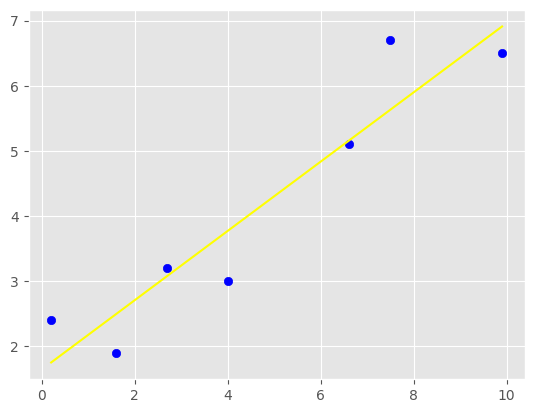

In [26]:
plt.scatter(x5, y5, color='blue')
plt.plot(x5, regr.predict(x5), color= 'yellow')
plt.style.use('ggplot')
plt.show()

- Reminder: this plot is of data (x,y), not the cost surface over θ parameters.

- Important conceptual distinction:

Previous lessons plotted cost functions in parameter space (e.g., cost as a function of θ₀, θ₁).

Here we plot data & fitted line (x → ŷ). The cost surface depends on θ values, not the x/y axes of this plot.

**KEY TERMS / Questions**

- X shape requirement: X must be 2-D (n_samples, n_features). Use .reshape(n,1) or np.array([x]).T.

- y shape: sklearn commonly accepts y as 1-D (n_samples,). Lesson used (n_samples, 1)—be consistent with how you index intercept_ / coef_.

- regr.intercept_ / regr.coef_: intercept is often an array ([b]) and coef is an array (shape (1,1) for single feature) — index accordingly.

- ŷ (y-hat): predicted values from the model regr.predict(X).

- Question to check: do you pass y as 1-D or 2-D in your code? If 2-D, remember how you index intercept_ and coef_.

**Summary**

You generated a small sample dataset (x_5, y_5), learned that scikit-learn requires the feature matrix X to be 2-D, and saw two ways to convert a 1-D vector into (n_samples, 1) (.reshape or double brackets + .T). You fitted a LinearRegression model, extracted the intercept and slope (θ₀, θ₁), and plotted the data with the fitted line. Finally, you were reminded of the key conceptual difference: the regression plot shows data and predictions (x → ŷ), whereas earlier lessons were plotting cost surfaces in parameter (θ) space.

## Implementing MSE concept

In [10]:
# theta0 and theta1 were extracted from the fitted model
y_hat = theta_0 + theta_1 * x5
print(y_hat.shape)
print("Estimated values of y (y_hat):\n", y_hat)
print("Actual values of y:\n", y5)
print("Differences between these:\n", abs(y5 - y_hat))

(7, 1)
Estimated values of y (y_hat):
 [[1.75269952]
 [2.49686495]
 [3.08156635]
 [3.7725771 ]
 [5.1545986 ]
 [5.63299066]
 [6.90870282]]
Actual values of y:
 [[2.4]
 [1.9]
 [3.2]
 [3. ]
 [5.1]
 [6.7]
 [6.5]]
Differences between these:
 [[0.64730048]
 [0.59686495]
 [0.11843365]
 [0.7725771 ]
 [0.0545986 ]
 [1.06700934]
 [0.40870282]]


## Equivalent ways to implement MSE

In [11]:
def mse_calc(y, y_hat):
    # return 1/y.size * sum((y - y_hat)**2)
    return np.mean((y - y_hat)**2) # or np.average() 

Check against scikit-learn built-in:

In [12]:
result= mse_calc(y5, y_hat)

print("MSE calculated manually:", result)
print("MSE calculated via sklearn with manually calculated y_hat values:\n",
      mean_squared_error(y5, y_hat))
print("MSE calculated via sklearn with regr.predict() values:\n",
      mean_squared_error(y5, regr.predict(x5)))

MSE calculated manually: 0.384953644017444
MSE calculated via sklearn with manually calculated y_hat values:
 0.384953644017444
MSE calculated via sklearn with regr.predict() values:
 0.384953644017444


**Practical notes / gotchas**

- Don’t hardcode 1/n — use y.size or len(y) so function works for any dataset.

- regr.predict(...) expects the same shape as used to fit (i.e. X shaped (n_samples, n_features)). If you used X = x_5.reshape(-1,1) when fitting, call regr.predict(X) (or regr.predict(x_5.reshape(-1,1))).

- np.average((y-y_hat)**2, axis=0) does both sum-of-squares and divide-by-N in one call; for 1D arrays axis=0 is appropriate.

**KEY TERMS / Questions**

- ŷ (y-hat) — model predicted values (Ŷ = θ₀ + θ₁·x for linear regression).

- MSE (Mean Squared Error) — average of squared residuals: (1/n) Σ (yᵢ − ŷᵢ)².

- np.average vs sum + divide — both compute the mean; np.average is concise and works well with NumPy arrays.

- Shape requirement for sklearn — X must be 2-D: (n_samples, n_features) even if n_features == 1.

Questions to check yourself

- Did you reshape x_5 as (n,1) when fitting, and are you calling regr.predict with the same shape?

- Are you using .size (or len) instead of a hardcoded n in your mse function?

- Do mse(y, y_hat) and mean_squared_error(y, y_hat) return the same numeric result?

**Summary**

You computed predicted values y_hat = θ₀ + θ₁·x from the fitted linear model, implemented a general mse(y, y_hat) function in three ways (pure Python sum, using y.size, and np.average), and validated the manual calculation against sklearn.metrics.mean_squared_error. Important practical points: always avoid hardcoding sample count, ensure X has the correct 2-D shape for sklearn calls, and use np.average for concise numeric code.

# 3D plot for the MSE cost function
### Make data for thetas

In [13]:
# Goal: visualize the MSE cost surface over θ₀ and θ₁ by computing MSE
# for many (θ₀, θ₁) combinations and plotting a surface.

nr_thetas = 100
th_0 = np.linspace(-1, 3, nr_thetas)   # θ₀ values
th_1 = np.linspace(-1, 3, nr_thetas)   # θ₁ values

In [14]:
# converting to 2D grid:
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
# plot_t0.shape == plot_t1.shape == (nr_thetas, nr_thetas)

plot_t0[i,j] and plot_t1[i,j] are the θ₀ and θ₁ at grid cell (i,j).

In [15]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

## Calc MSE over the grid with nested-loops

In [16]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        theta0 = plot_t0[i, j]
        theta1 = plot_t1[i, j]
        y_hat = theta0 + theta1*x5      # predicted values for dataset x_5
        plot_cost[i, j] = mse_calc(y5, y_hat)      # store MSE at grid cell

This is the standard pattern: outer loop over rows (i), inner loop over columns (j).

mse is your previously defined MSE function (use y.size inside it — do not hardcode N).

Plotting the surface

- Use plot_t0, plot_t1, and plot_cost as the X, Y, Z inputs to the 3D surface/contour plot functions.

- Ensure the arrays are the same shape: plot_t0.shape == plot_t1.shape == plot_cost.shape.

- If you want a denser, smoother surface, increase nr_thetas (e.g., 50 or 100) — beware of compute time.

A few practical notes

- Keep nr_thetas in a variable (no hardcoding) so changing resolution updates everything automatically.

- The nested loop approach is straightforward and easy to read. For large grids you can vectorize or use broadcasting, but nested loops are fine for teaching/medium sizes.

- When plotting, check orientation: sometimes meshgrid order (np.meshgrid(x,y) vs np.meshgrid(y,x)) affects i,j indexing and which axis corresponds to θ₀ vs θ₁. Confirm by quick prints.

- i = row index, j = column index. Order matters for traversal but either order visits every cell.

**KEY TERMS / Questions**

- meshgrid — converts 1-D coordinate vectors into 2-D coordinate matrices for surface plotting.

- np.zeros((r,c)) — creates a 2-D array initialized to zero with r rows and c columns.

- Nested loop — loop inside a loop, used to visit every element of a 2-D array (for i in ...: for j in ...:).

- f-string — Python string formatting f"{var}" allowing inline variable interpolation (very handy for debug prints).

- Question: Why must plot_cost be 2-D (not 1-D)?
Answer: Because a surface needs a Z value for each (X,Y) grid cell; you need a matrix of costs matching the mesh shape.

- Question: If the plotted surface looks transposed/rotated, what to check?
Answer: Confirm meshgrid order and which axis you used for i (rows) and j (columns); swap th_0/th_1 in meshgrid if needed.

**Summary**

Create ranges for θ₀ and θ₁ with linspace, turn those 1-D vectors into 2-D grids with np.meshgrid, and allocate a plot_cost matrix with np.zeros((nr_thetas, nr_thetas)). Use nested for i / for j loops to compute y_hat = θ₀ + θ₁ * x_5 for each grid cell, evaluate mse(y_5, y_hat), and store it in plot_cost[i,j]. The result is a 2-D MSE surface that you can pass to your 3D plotting routine. Use f-strings for readable debug output, and increase nr_thetas for smoother surfaces (watch computation time).

# * * *

**Goal**: compute MSE for a grid of θ₀ and θ₁ values and plot the MSE surface, then locate the (θ₀, θ₁) that gives the minimum MSE.

Indexing the mesh arrays: plot_t0 and plot_t1 are 2-D (from np.meshgrid). Access a grid point with plot_t0[i, j] and plot_t1[i, j].

If you print plot_t0[i, j] across the loops you will see row-by-row values if you use i then j. Using j then i traverses column-wise.

### Plot the surface

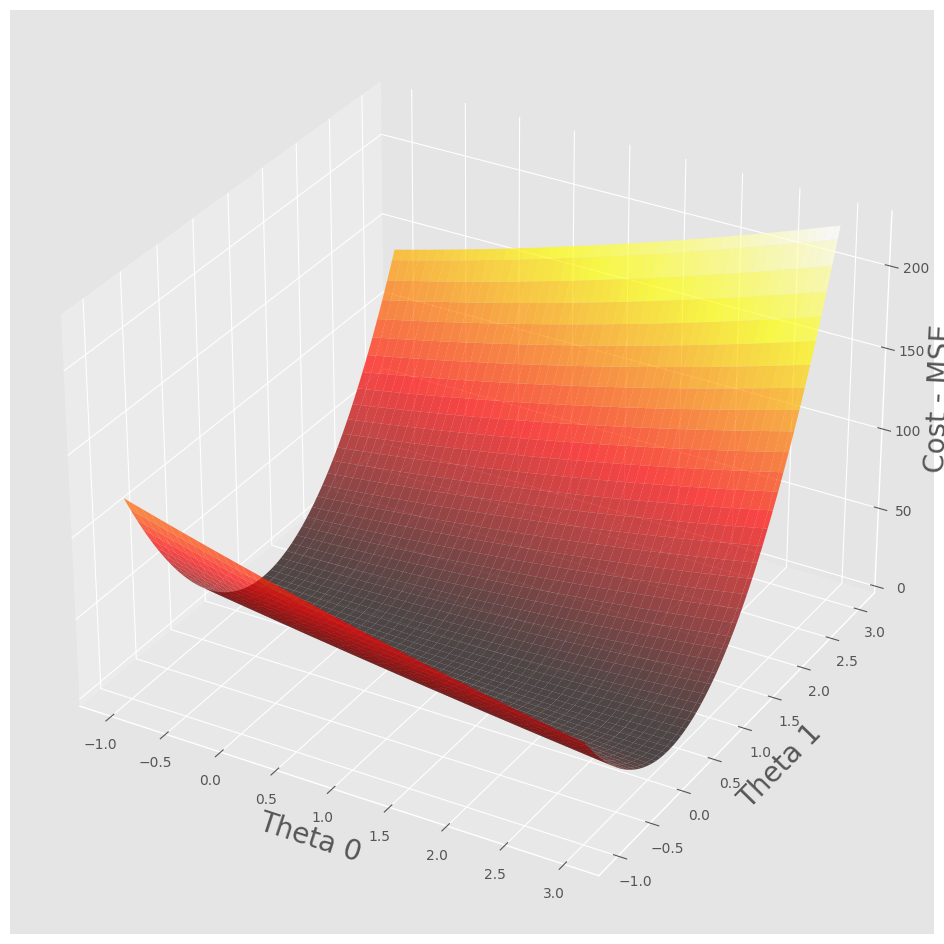

In [24]:
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=0.7)
plt.show()

### Find the minimum on the grid:

In [29]:
print("Minimum value of MSE on the grid:", plot_cost.min())
ij_min = np.unravel_index(indices= plot_cost.argmin(), shape= plot_cost.shape)
print("Minimum occurs at grid indices (i,j):", ij_min)

print('Min MSE for Theta 0 at plot_t0[38][65]', plot_t0[38][65])
print('Min MSE for Theta 1 at plot_t1[38][65]', plot_t1[38][65])
# This yields the θ₀ and θ₁ associated with the smallest grid MSE
# — useful to compare with analytic or sklearn results.

Minimum value of MSE on the grid: 0.3851104114740481
Minimum occurs at grid indices (i,j): (np.int64(38), np.int64(65))
Min MSE for Theta 0 at plot_t0[38][65] 1.6262626262626263
Min MSE for Theta 1 at plot_t1[38][65] 0.5353535353535355


### if you want a cleaner output

In [30]:
# ...existing code...
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print("Minimum occurs at grid indices (i,j): ({},{})".format(int(ij_min[0]), int(ij_min[1])))
# ...existing code...

Minimum occurs at grid indices (i,j): (38,65)


Practical notes

- The nested-loop grid search is brute force — simple and very instructive, but not efficient for high-dimensional parameter spaces. For finer resolution or higher dimensions use vectorized evaluation, optimization methods, or analytic formulas when available.

- Check meshgrid ordering if axes appear swapped on the plot (swap inputs or indices if needed).

- Use cmap (colormap) to make the surface readable and highlight minima.

**KEY TERMS / Questions**

- meshgrid: converts 1-D coordinate vectors into 2-D coordinate matrices for surface plotting.

- plot_cost (2-D array): stores MSE values for each (θ₀, θ₁) grid cell.

- nested loop: for i in ...: for j in ...: — used to visit every element in a 2-D grid.

- np.unravel_index: maps a flat index (e.g. from argmin()) back to 2-D indices (i, j).

- argmin vs min: plot_cost.min() gives the minimum value; plot_cost.argmin() gives the flattened index of that minimum.

- Question: If your surface looks transposed, what should you check?
Answer: Confirm the order you passed arrays to np.meshgrid and whether you index plot_t0[i,j] (row, col) or swapped.

**Summary**

You built a brute-force grid search: create θ₀/θ₁ ranges → np.meshgrid → plot_cost = np.zeros(...) → nested loops compute y_hat and MSE for each grid cell → plot the surface with ax.plot_surface(...) (use cmap for clarity) → find the minimum with argmin + np.unravel_index and read off the corresponding θ₀, θ₁ from the mesh. Increasing nr_thetas smooths the surface but increases compute cost; the grid method is easy to understand but scales poorly in dimensionality.